# Models and Evaluation

In [236]:
import pandas as pd
import numpy as np
from IPython.display import display

data = pd.read_csv('data_processed/data.csv')
data

,loan_id,account_id,loan_amount,loan_duration,loan_payments,status,account_district_id,account_frequency,disp_id,client_id,...,client_district_id,gender,card_id,card_disp_id,card_type,last_balance,monthly_diff,code,age_on_loan_request,age_on_loan_request_disc
0,5314,1787,96396,12,8033,-1,30,weekly issuance,2166,2166,...,30,Female,NaN,NaN,NaN,20100.0,6700,30,46,40-49
1,5316,1801,165960,36,4610,1,46,monthly issuance,2181,2181,...,46,Male,NaN,NaN,NaN,52208.9,14733,46,25,21-29
2,6863,9188,127080,60,2118,1,45,monthly issuance,11006,11314,...,45,Male,NaN,NaN,NaN,20272.8,-6859,45,57,50-59
3,5325,1843,105804,36,2939,1,12,monthly issuance,2235,2235,...,14,Female,NaN,NaN,NaN,34292.7,-11054,14,53,50-59
4,7240,11013,274740,60,4579,1,1,weekly issuance,13231,13539,...,63,Male,NaN,NaN,NaN,41142.9,-30531,63,15,0-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,9030,155616,48,3242,1,72,monthly issuance,10813,11121,...,72,Female,NaN,NaN,NaN,60694.1,5313,72,26,21-29
324,5625,3189,222180,60,3703,-1,29,monthly issuance,3855,3855,...,29,Male,NaN,NaN,NaN,59578.8,4583,29,58,50-59
325,6805,8972,45024,48,938,1,70,monthly issuance,10742,11050,...,70,Female,NaN,NaN,NaN,38384.3,8387,70,40,40-49
326,7233,10963,115812,36,3217,1,16,monthly issuance,13172,13480,...,16,Male,NaN,NaN,NaN,41878.1,2204,16,44,40-49


In [237]:
no_ids = [c for c in data.columns if c[-3:] != '_id' and c != 'code']
data = data[no_ids]
data.drop(['account_frequency', 'gender', 'card_type'], axis=1, inplace=True)
display(data.head(10))

categorical_columns = list(data.select_dtypes("object").columns)

def get_features(df):
    return df.drop('status', axis=1).values
def get_target(df):
    return df['status'].values

display(data.info())


results = {}

/tmp/ipykernel_37496/4251433606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['account_frequency', 'gender', 'card_type'], axis=1, inplace=True)


,loan_amount,loan_duration,loan_payments,status,has_disponent,last_balance,monthly_diff,age_on_loan_request,age_on_loan_request_disc
0,96396,12,8033,-1,False,20100.0,6700,46,40-49
1,165960,36,4610,1,False,52208.9,14733,25,21-29
2,127080,60,2118,1,False,20272.8,-6859,57,50-59
3,105804,36,2939,1,False,34292.7,-11054,53,50-59
4,274740,60,4579,1,False,41142.9,-30531,15,0-19
5,87840,24,3660,1,False,43847.8,-13741,14,0-19
6,52788,12,4399,1,False,21029.0,4185,21,21-29
7,174744,24,7281,-1,False,58140.9,9690,45,40-49
8,154416,48,3217,1,False,53402.7,8900,24,21-29
9,117024,24,4876,1,False,53193.5,-12765,58,50-59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amount               328 non-null    int64  
 1   loan_duration             328 non-null    int64  
 2   loan_payments             328 non-null    int64  
 3   status                    328 non-null    int64  
 4   has_disponent             328 non-null    bool   
 5   last_balance              328 non-null    float64
 6   monthly_diff              328 non-null    int64  
 7   age_on_loan_request       328 non-null    int64  
 8   age_on_loan_request_disc  328 non-null    object 
dtypes: bool(1), float64(1), int64(6), object(1)
memory usage: 20.9+ KB


None

In [238]:
def split_data(features, target, test_size=0.2, random_state=1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [239]:
def normalize_data(X_train, X_test, scaler):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    return X_train, X_test

def standardize_data(X_train, X_test):
    from sklearn.preprocessing import StandardScaler
    normalize_data(X_train, X_test, StandardScaler())
def min_max_scaling(X_train, X_test):
    from sklearn.preprocessing import MinMaxScaler
    normalize_data(X_train, X_test, MinMaxScaler())

In [240]:
def encode_data(df, columns):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in columns:
        if (col in df.keys()):
            df[col] = le.fit_transform(df[col])
    return df

In [241]:
def add_model(name, model):
    df = data.copy()
    if (name == 'dtc'):
        df.drop(['age_on_loan_request_disc'], inplace=True, axis=1)
    else:
        df.drop(['age_on_loan_request'], inplace=True, axis=1)

    df = encode_data(df, categorical_columns)
    X_train, X_test, y_train, y_test = split_data(get_features(df), get_target(df))
    # X_train, X_test = standardize_data(X_train, X_test)
    # X_train, X_test = min_max_scaling(X_train, X_test)

    model.fit(X_train, y_train)
    results[name] = {'model': model, 
                    'X_train': X_train, 
                    'X_test': X_test, 
                    'y_train': y_train, 
                    'y_test': y_test}

In [242]:
from sklearn.tree import DecisionTreeClassifier
add_model('dtc',
    DecisionTreeClassifier()
)

In [243]:
from sklearn.neighbors import KNeighborsClassifier
add_model('knn',
    KNeighborsClassifier()
)

In [244]:
from sklearn.neural_network import MLPClassifier
add_model('mlp',
    MLPClassifier()
)

In [245]:
from sklearn.naive_bayes import GaussianNB
add_model('gnb',
    GaussianNB()
)

In [246]:
from sklearn.svm import SVC
add_model('svc',
    SVC(probability=True)
)

In [247]:
from sklearn.ensemble import RandomForestClassifier
add_model('rf',
    RandomForestClassifier()
)

## Prediction

In [248]:
def predict(name, isTrain=False):
    prefix = 'train' if isTrain else 'test'
    result = results[name]
    pred = result['model'].predict(result['X_'+prefix])
    result[prefix+'pred'] = pred

for name in results.keys():
    predict(name)
for name in results.keys():
    predict(name, isTrain=True)

In [249]:
def predict_proba(name, isTrain=False):
    prefix = 'train' if isTrain else 'test'
    result = results[name]
    proba = result['model'].predict_proba(result['X_'+prefix])
    result[prefix+'pred_prob'] = proba

for name in results.keys():
    predict_proba(name)
for name in results.keys():
    predict_proba(name, isTrain=True)


## Evaluation

In [279]:
def recall(cm, i):
    return cm[i][i]/sum(cm[i]) if sum(cm[i]) > 0 else np.inf

def precision(cm, i):
    cmt = np.copy(cm).transpose()
    return cm[i][i]/sum(cmt[i]) if sum(cmt[i]) > 0 else np.inf

def f_measure(cm, i):
    p = precision(cm, i)*100
    r = recall(cm, i)*100
    return 2 * (p * r) / (p + r) if p != np.inf and r != np.inf and p + r > 0 else np.nan

In [251]:
from matplotlib.figure import Figure
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def conf_matrix(y_test, y_pred, name, prefix):
    cm =  confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['True', 'False'])
    disp.plot()
    disp.ax_.set_title(name + ' ' + prefix)

In [264]:
def score(name, isTrain=False):
    prefix = 'train' if isTrain else 'test'
    result = results[name]
    result[prefix+'score'] = result['model'].score(result['X_'+prefix], result['y_'+prefix])
    print(prefix, name.upper()+":\t", result[prefix+'score'])

print('\tAccuracy')
for name in results.keys():
    score(name)
for name in results.keys():
    score(name, isTrain=True)

	Accuracy
test DTC:	 0.8787878787878788
test KNN:	 0.8939393939393939
test MLP:	 0.8181818181818182
test GNB:	 0.8484848484848485
test SVC:	 0.8939393939393939
test RF:	 0.9090909090909091
train DTC:	 1.0
train KNN:	 0.8778625954198473
train MLP:	 0.851145038167939
train GNB:	 0.8625954198473282
train SVC:	 0.851145038167939
train RF:	 1.0


In [282]:
def evaluate(name, isTrain=False):
    prefix = 'train' if isTrain else 'test'
    result = results[name]
    cm =  confusion_matrix(result['y_'+prefix], result[prefix+'pred'])
    print(prefix, name.upper()+":", '\tRecall:',round(recall(cm, 0), 2), '\t Precision:',round(precision(cm, 0), 2), '\tF_Measure:',round(f_measure(cm, 0), 2))

for name in results.keys():
    evaluate(name)
for name in results.keys():
    evaluate(name, isTrain=True)


test DTC: 	Recall: 0.43 	 Precision: 0.43 	F_Measure: 42.86
test KNN: 	Recall: 0.0 	 Precision: inf 	F_Measure: nan
test MLP: 	Recall: 0.29 	 Precision: 0.22 	F_Measure: 25.0
test GNB: 	Recall: 0.0 	 Precision: 0.0 	F_Measure: nan
test SVC: 	Recall: 0.0 	 Precision: inf 	F_Measure: nan
test RF: 	Recall: 0.29 	 Precision: 0.67 	F_Measure: 40.0
train DTC: 	Recall: 1.0 	 Precision: 1.0 	F_Measure: 100.0
train KNN: 	Recall: 0.21 	 Precision: 0.89 	F_Measure: 33.33
train MLP: 	Recall: 0.26 	 Precision: 0.5 	F_Measure: 33.9
train GNB: 	Recall: 0.26 	 Precision: 0.59 	F_Measure: 35.71
train SVC: 	Recall: 0.0 	 Precision: inf 	F_Measure: nan
train RF: 	Recall: 1.0 	 Precision: 1.0 	F_Measure: 100.0


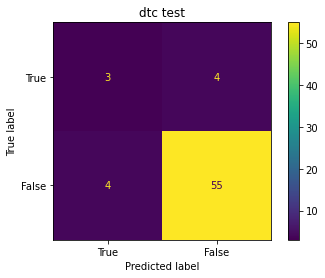

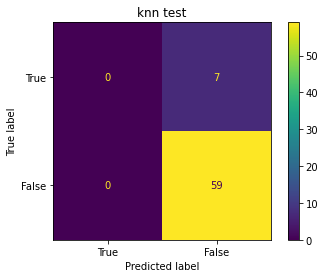

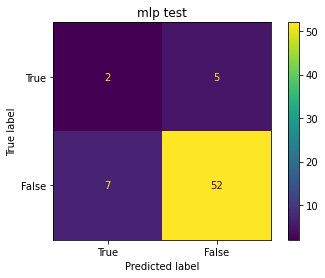

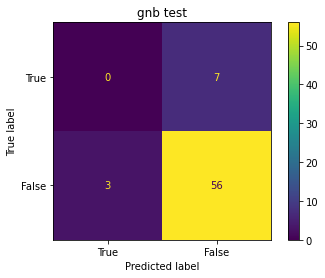

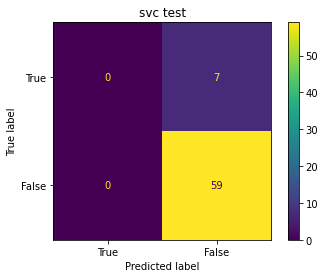

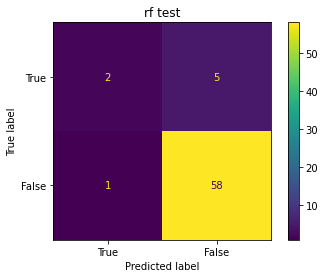

In [262]:
prob = 0.50

prefixes = ('test', 'train')
for prefix in prefixes[:1]:
    for name in results.keys():
        result = results[name]
        prefix = 'test'
        conf_matrix(result['y_'+prefix], np.where(result[prefix+'pred_prob'][:,-1] > prob, 1, -1), name, prefix)

DTC test:	 0.6803874092009685
DTC train:	 1.0
KNN test:	 0.602905569007264
KNN train:	 0.8675405312176612
MLP test:	 0.5774818401937045
MLP train:	 0.6046912728527077
GNB test:	 0.7239709443099274
GNB train:	 0.7360009198574221
SVC test:	 0.5060532687651331
SVC train:	 0.7007013912843508
RF test:	 0.8898305084745762
RF train:	 1.0


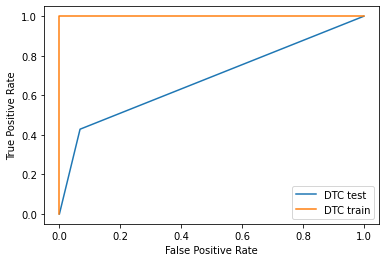

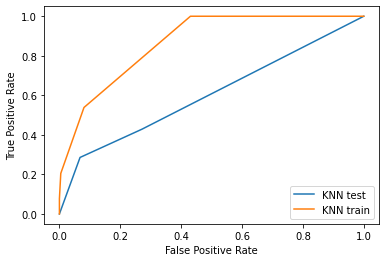

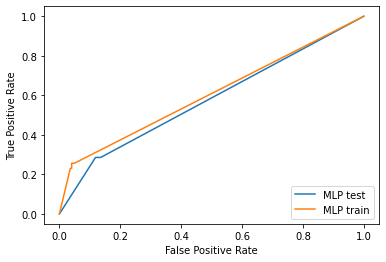

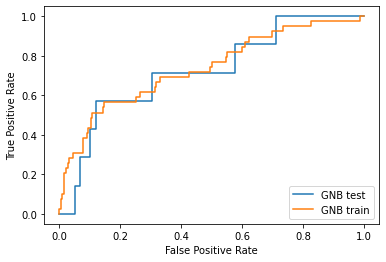

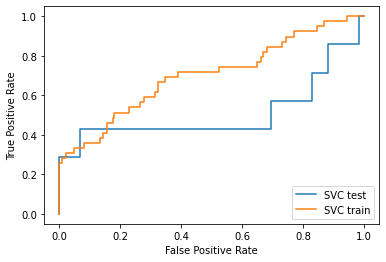

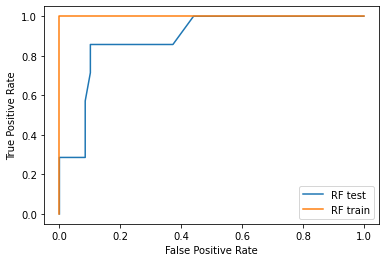

In [258]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

def roc_and_auc(name, isTrain=False):
    fig, ax = plt.subplots()
    for prefix in ('test', 'train'):
        result = results[name]
        fpr, tpr, thresholds = roc_curve(result['y_'+prefix], result[prefix+'pred_prob'][:,0], pos_label=result['model'].classes_[0])
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax,name=(name.upper()+' '+prefix))
        print(name.upper(), prefix + ":\t", auc(fpr, tpr))

for name in results.keys():
    roc_and_auc(name)